# Appendix [A](#http://arxiv.org/abs/2403.06162:2403.06162) Supplementary Notebook

## Model B  (Includes Model A for Comparison)

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

* This Python based jupyter-notebook demonstrates simple example that support the findings of the study [report](#http://arxiv.org/abs/2403.06162:2403.06162) "Nonequilibrium phase transitions in a 2D Ferromagnetic spins with effective interactions". Currently, the paper has been submitted to IOP Publishing (JPA). Notice that we use this notebook for demonstration purpose. Most of the main results in the [report](#http://arxiv.org/abs/2403.06162:2403.06162) were calculated with c++ using HP Z2 [workstaion](img/hardware).
![hardware](img/hardware.png)

## 1 (13)   Metropolis Monte Carlo Dynamics (mmcd2)
 * In the [report](#http://arxiv.org/abs/2403.06162:2403.06162) the most commonly used transition rates namely the Metropolis update rule is defined as
$$
W =  \underbrace{\texttt{MIN} \left[1, \exp\left[ -\beta  \Delta E \right]\frac{}{}\right]}_{\rm (A13)}
 \;  \Rightarrow   \; \underbrace{\texttt{MIN} \left[1, \exp\left[-\beta  d E \right]\frac{}{}\right]}_{\rm (B13)} \texttt{,}
$$
where $\beta = 1/T$ and $ \Delta E $ is the energy change due to the transition from a present state to a new one. 
* It has been shown that this change in energy is given as
$$
 \Delta E =   (1+ h) dE^{0}  \texttt{,}
$$
where $h$ is an effective parameter and $ d E^{0} = \Delta E (h=0)$ is well-known.
* The arrow declares that an update rule is modified through replacing $\Delta E$ by $dE$, where
$$
d E =  \Delta E^{0} +  h |\Delta E^{0}|\rm{, \; \; \; \;  \; \; }   \Delta E^{0} =  2 S_{i} \sum_j S_{j} \texttt{.}
$$
Therefore, replacing $\Delta E$ in (A13) by this effective $d E$, we get the modified update rule (B13).
The [flow chart](img/figure01.PNG) summarizes the modified Metropolis algorithm which was one of the update rule implemented.
![flow chart](img/figure01.PNG)
* The basics of the flow chart are as follows. Suggest a transition from $S_{i}=\pm 1$ to $S_{i}=\mp  1$ and always accept accept the transition with a certain probability which requires to compute ratio $r=f$. Then generate a random number $u=rand()$ distributed uniformly between $0 \leq u < 1$ and accept the transition if $u <  f $. If $ f>1$,  it is actually unnecessary to bother generating $u$.
For the main [results](#http://arxiv.org/abs/2403.06162:2403.06162), this process would be repeated for $N$ sweeps as a MC step (MCS) per site where we discard the first $10^{5}$ MCS per site to allow it to attain NESS for all systems. Then again, we measure the averaged quantities of interest in completing more $10^{5}$ MCS per site. The average over the representatives is done using 100 independent measurements. However, for demonstration purposes, these should be reduced here for fast calculation.

In [2]:
def randomstate(L):
    '''
    Returns a random state of Ising configuration to ascertain an initial condition
    '''
    state = np.random.choice([-1,1], size=(L,L))
    return state

<function matplotlib.pyplot.show(close=None, block=None)>

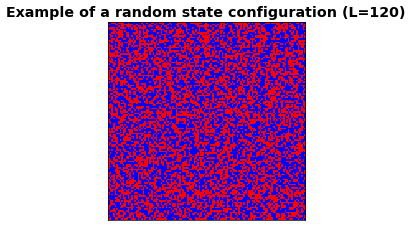

In [3]:
random_confg=randomstate(120)
fig,ax=plt.subplots(figsize=(4,4),dpi=64)
ax.matshow(random_confg, cmap=plt.cm.bwr)
ax.set_xticks([]),ax.set_yticks([])
plt.title("Example of a random state configuration (L=120)", fontsize = 16,fontweight="bold")
plt.show

* Let $\Delta E^{0} =\texttt{dE0}$,
$$\texttt{dE0} = 2 S_{i} \sum_j S_{j} \equiv \{-8,-4,0,4,8\},$$
is the change in the energy if the flip is accepted for the usual Metropolis update rule, the modified versions are

###  Model A: 
The version that satisfies DB is 
$$\texttt{ dEA = dE0*(1+h)}$$

###  Model B: 
Calculate values of the quantities in which the update rule uses
 $$\texttt{ dEB = dE0+h*abs(dE0)},$$
where we define $h$ as an effective  parameter $\texttt{h=heff}$ that takes any fixed value  $-1\le h < \infty $.

### Block of functions used in the $ \texttt{Main}$ part

In [4]:
def mmcd(confg, beta,mod):
    '''
    Metropolis MC Dynamics
    confg = Configuration of 2D Ising state
    beta = 1./T
    mod = False: Model A (A13)   the update rule is not modified
    mod = True:  Model B (B13)    the update rule is modified'''  
    for ix in range(L):
        for iy in range(L):
            x = np.random.randint(0, L)
            y = np.random.randint(0, L)
            si =  confg[x, y]
            sjn = confg[(x+1)%L,y]+confg[x,(y+1)%L]+confg[(x-1)%L,y]+confg[x,(y-1)%L] 
            dE0 = 2.*si*sjn
            dEA = dE0*(1+h)
            dEB = dE0+h*abs(dE0)
            '''
            f = Metropolis criterion (flipping probability)
            fud = up \to down or +1\to-1
            fdu = Reverse criterion '''
            if mod==False:
                fud =  min(1,np.exp(-beta*dEA))
                fdu =  min(1,np.exp(beta*dEA))               
            else:
                fud =  min(1,np.exp(-beta*dEB))
                fdu =  min(1,np.exp(beta*dEB))        
            if fdu!=0 and rand()<fud/fdu:
                si *= -1
            confg[x, y] = si
    return confg
def EvEnergy(confg,mod):
    '''
    Evaluate an energy of the confg
    '''
    energy=0.
    for i in range(len(confg)):
        for j in range(len(confg)):
            Si = confg[i,j]
            Sjn = confg[(i+1)%L,j]+confg[i,(j+1)%L]+confg[(i-1)%L,j]+confg[i,(j-1)%L]
            energy -= Si*Sjn*(1.0+h)
    return 0.5*energy      # 0.5 compensates the double counting
def EvMagnetization(confg):
    '''
    Evaluate Magnetization of the confg
    '''
    magnetization = np.sum(confg)
    return abs(magnetization)

### Input Parameters

In [5]:
'''
 h:=heff '''
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
h = 0.25
'''
'Default Ep = \pm 0.25 '''
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
if h>=0:
    Thi = 4*(1+h);     # The starting high (hot) temperature
    Tlo = 1.*(1+h);     # The low (cold) temperature
else:Thi = 3.2; Tlo =-0.2
nt = int(51)      # number of temperature
T  =  np.linspace(Thi, Tlo,nt);
TcO = 2/np.log(1.0+np.sqrt(2))      # Tc for h = 0 is known
if h>=1:
    Tch=2*TcO
    Tc= (1+h)*TcO                   # Tc for mod C
elif h<1 and h>-1: 
    Tch = (1+h)*TcO                 # Tc for db = False
    Tc= (1+h)*TcO 
else:
    Tch = 0; 
    Tc= (abs(h)-1)*TcO 

In [6]:
'''
For fast simulation, please change the following  parameters each to its minimal value 
'''
nt = int(51)
L  = 20              #  size of the lattice, N = L x L
eqMCS = 3200         #  number of MCS for equilibration
evMCS = 3200         #  number of MCS for evaluation or measurement
N = int(L*L)
n1 = 1.0/(evMCS*N)
n2  =  1.0/(evMCS*evMCS*N)
m,E = np.zeros(nt),np.zeros(nt)
X,C =  np.zeros(nt),np.zeros(nt)

### The $ \texttt{Main}$ part 

In [7]:
def Metropolis(mod):
    for t in range(nt):
        '''
        initialize'''
        confg = randomstate(L)
        M1=E1 = 0
        M2=E2 = 0
        ib=1./T[t]; ib2=ib*ib;

        for i in range(eqMCS):           # equilibrate
            mmcd(confg,ib,mod)           # Metropolis MC Dynamics

        for i in range(evMCS):
            mmcd(confg,ib,mod)       
            En = EvEnergy(confg,mod)       # evaluate the energy
            Mn  = EvMagnetization(confg)  # evaluate the magnetisation
            E1 = E1 + En
            M1 = M1 + Mn
            M2 = M2 + Mn*Mn
            E2 = E2 + En*En
        '''
        obtain intensive values ''' 
        m[t] = n1*M1
        E[t] = n1*E1
        X[t] = (n1*M2 - n2*M1*M1)*ib
        C[t] = (n1*E2 - n2*E1*E1)*ib2
    return mod

 ### (A13) Calculated values of the quantities in which the update rule uses model A

In [8]:
'''
Mod = False: Model A (A13)
'''
Metropolis(False)

False

In [9]:
'''
A13 refers to the results calculated for model A (Metropolis)
'''
A13 = pd.DataFrame({'T':T,'m':m, 'X': X, 'E':E, 'C': C})
A13.head(2)

,T,m,X,E,C
0,5.000,0.084205,0.298943,-0.693336,0.170197
1,4.925,0.083433,0.321871,-0.711395,0.178663


In [10]:
'''
mod = True
B13 refers to the results calculated for model B (Metropolis)
'''
Metropolis(False)

False

In [11]:
B13 = pd.DataFrame({'T':T,'m':m, 'X': X, 'E':E, 'C': C})

 ### (B13) Calculated values of the quantities in which the update rule uses model B

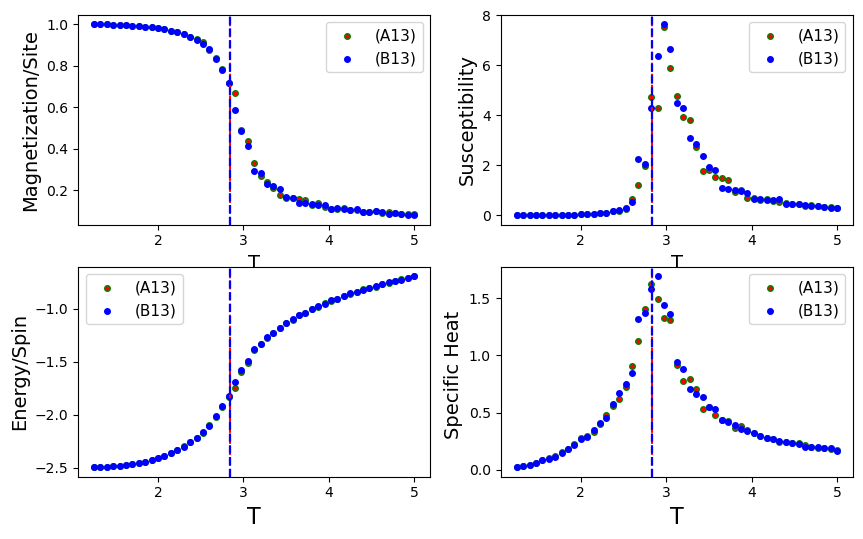

In [12]:
'''
Plot of the calculated quantities (here h = 0.25) for L = 20 
'''
dot = int(16)
x=T
f = plt.figure(figsize=(10, 6));
sf = f.add_subplot(2,2,1);
sf.scatter(x, A13["m"], s=dot, marker='o', color='g',label="(A13)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B13["m"], s=dot, marker='o', color='b', label = "(B13)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=14); 
plt.ylabel("Magnetization/Site", fontsize=14); plt.axis('tight');
plt.legend(fontsize=11)
sf = f.add_subplot(2,2,2);
sf.scatter(x, A13["X"], s=dot, marker='o', color='g',label = "(A13)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B13["X"], s=dot, marker='o', color='b', label = "(B13)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=14); 
plt.ylabel("Susceptibility", fontsize=14);   plt.axis('tight');
plt.legend(fontsize=11)
sf = f.add_subplot(2,2,3);
sf.scatter(x,A13["E"], s=dot, marker='o', color='g',label = "(A13)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x,B13["E"], s=dot, marker='o', color='b', label = "(B13)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=16);
plt.ylabel("Energy/Spin", fontsize=14); plt.axis('tight');
plt.legend(fontsize=11)
sf=f.add_subplot(2,2,4);
sf.scatter(x, A13["C"], s=dot, marker='o', color='g',label = "(A13)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B13["C"], s=dot, marker='o', color='b', label = "(B13)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=16);  
plt.ylabel("Specific Heat ", fontsize=14);   plt.axis('tight');
plt.legend(fontsize=11)
plt.show()

### Figure:
* Plots of physical quantities magnetization per site, magnetic susceptibility, energy per spin and specific heat all as a function of temperature $T$. For values of $\texttt{h}\ge-1$ the position of vertical dashed lines (red and blue colors) provide estimate of $T_{c}$ in each of the two Models A and B (see keys).

* The examples $\texttt{h=0.25}$ shows that the results are agree with each other.
## Conclusion (13)
* Application of Metropolis update rule (A13), which satisfies DB at temperature $T^{0}$, generates equilibrium configurations of the Ising model at $T^{0}$. It is straightforward that the update rule ~(A13) satisfies DB at effective temperature $T_{\rm{eff}} = T/(1 \pm h)$ and generates equilibrium Ising configurations at this temperature. The system undergoes a PT when  $T_{\rm{eff}} = T_{c}^{0}$, i.e. at temperature $(1\pm h)T_{c}^{0}$ where $T_{c}^{0} = 2/\ln(1 + \sqrt{2})$ is the critical temperature of the usual Ising model.
* It is straightforward to check that the transition temperature of model B (B13) overlaps with that of model A for values of $-1 \le h\le 1$.  If $h > 1$,  B13 is equivalent to model A at $h=1$. Model B is equivalent to A at $h=-1$, whereas  model A becomes antiferromagnetic for $h < -1$.

## 2 (14) Glauber Monte Carlo Dynamics (gmcd2)
* In the [report](#http://arxiv.org/abs/2403.06162:2403.06162) the most commonly used transition rates namely the Glauber update rule is defined as
$$
W =  \underbrace{\frac{1}{2} \left( 1- \tanh \left[ \frac{\beta \Delta E}{2} \right] \right)}_{\rm (A14)} \;  \Rightarrow  \; 
\underbrace{\frac{1}{2} \left( 1- \tanh \left[ \frac{\beta d E}{2} \right]\right)}_{\rm (B14)}
\texttt{.}
$$
where $\beta = 1/T$ and $ \Delta E $ is the energy change due to the transition from a present state to a new one. 
* It has been shown that this change in energy is given as
$$
 \Delta E =   (1+ h) dE^{0}  \texttt{,}
$$
where $h$ is an effective parameter and $ d E^{0} = \Delta E (h=0)$ is well-known.
* The arrow declares that an update rule is modified through replacing $\Delta E$ by $dE$, where
$$
d E =  \Delta E^{0} +  h |\Delta E^{0}|\rm{, \; \; \; \;  \; \; }   \Delta E^{0} =  2 S_{i} \sum_j S_{j} \texttt{.}
$$
Therefore, replacing $\Delta E$ in (A14) by this effective $d E$, we get the modified update rule (B14).

In [13]:
def gmcd(confg,beta,mod):
    '''
    mod = False: Model A  (A14)   the update rule is not modified
    mod = True:  Model B  (B14)   the modified Glauber update rule'''  
    for xi in range(L):
        for yi in range(L):
            x = np.random.randint(0, L)
            y = np.random.randint(0, L)
            si =  confg[x, y]
            '''
            sjn = sum_j of nearest-neighbors'''
            sjn = confg[(x+1)%L,y]+confg[x,(y+1)%L]+confg[(x-1)%L,y]+confg[x,(y-1)%L] 
            dE0 = 2*si*sjn
            dEA = dE0*(1+h)
            dEB = dE0+h*abs(dE0)
            '''
            f = flipping probability '''
            if mod==True: 
                fu = 1.0-np.tanh(0.5*beta*dEB)   # Probability up \to down
                fd = 1.0+np.tanh(0.5*beta*dEB)   # Reveres d\to u
            else:
                fu = 1.0-np.tanh(0.5*beta*dEA)   # Probability up \to down
                fd = 1.0+np.tanh(0.5*beta*dEA)   # Reverse d\to u
            if fd!=0 and fu/fd>1:
                si *= -1
            elif fd!=0 and rand()<fu/fd:
                si *= -1
            confg[x, y] = si
    return confg

In [14]:
def Glauber(mod):
    for t in range(nt):
        '''
        initialize'''
        confg = randomstate(L)
        M1=E1 = 0
        M2=E2 = 0
        ib=1./T[t]; ib2=ib*ib;

        for i in range(eqMCS):           # equilibrate
            gmcd(confg,ib,mod)
        for i in range(evMCS):
            gmcd(confg,ib,mod)              
            En = EvEnergy(confg,mod)       # evaluate the energy
            Mn  = EvMagnetization(confg)   # evaluate the magnetisation
            E1 = E1 + En
            M1 = M1 + Mn
            M2 = M2 + Mn*Mn
            E2 = E2 + En*En
        '''
        obtain intensive values ''' 
        m[t] = n1*M1
        E[t] = n1*E1
        X[t] = (n1*M2 - n2*M1*M1)*ib
        C[t] = (n1*E2 - n2*E1*E1)*ib2
    return mod

 ## (A14)

In [15]:
'''
mod=B is False: Model A (A14)
'''
Glauber(False)

False

In [16]:
'''
Data frame of A14 '''
A14 = pd.DataFrame({'T':T,'m':m, 'X': X, 'E':E, 'C': C})

 ## (B14)

In [17]:
'''
mod=B is True: Model B (B14) '''
Glauber(True)

True

In [18]:
B14 = pd.DataFrame({'T':T,'m':m, 'X': X, 'E':E, 'C': C})

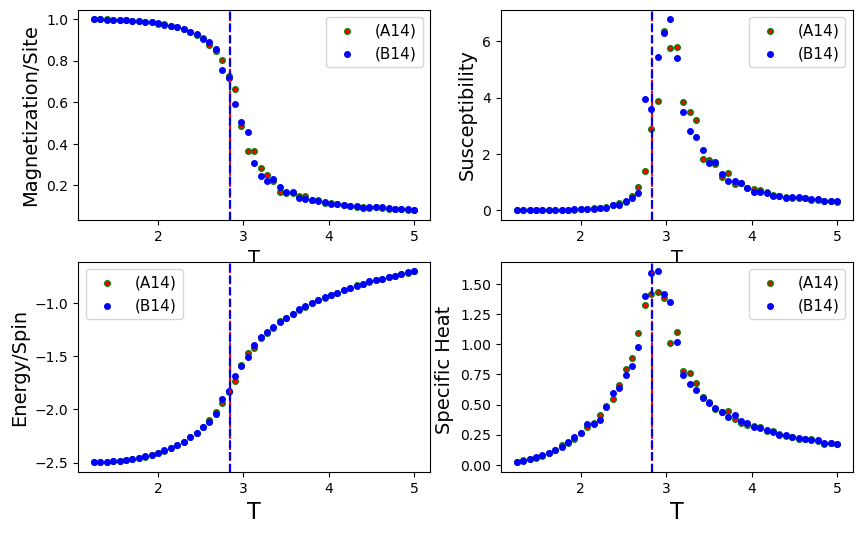

In [19]:
'''
Plot of the calculated quantities (here h = 0.25) for L = 20 
'''
dot = int(16)
x=T
f = plt.figure(figsize=(10, 6));
sf = f.add_subplot(2,2,1);
sf.scatter(x, A14["m"], s=dot, marker='o', color='g',label="(A14)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B14["m"],  s=dot, marker='o', color='b', label = "(B14)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=14); 
plt.ylabel("Magnetization/Site", fontsize=14); plt.axis('tight');
plt.legend(fontsize=11)
sf = f.add_subplot(2,2,2);
sf.scatter(x, A14["X"], s=dot, marker='o', color='g',label = "(A14)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B14["X"], s=dot, marker='o', color='b', label = "(B14)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=14); 
plt.ylabel("Susceptibility", fontsize=14);   plt.axis('tight');
plt.legend(fontsize=11)
sf = f.add_subplot(2,2,3);
sf.scatter(x,A14["E"], s=dot, marker='o', color='g',label = "(A14)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x,B14["E"], s=dot, marker='o', color='b', label = "(B14)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=16);
plt.ylabel("Energy/Spin", fontsize=14); plt.axis('tight');
plt.legend(fontsize=11)
sf=f.add_subplot(2,2,4);
sf.scatter(x, A14["C"], s=dot, marker='o', color='g',label = "(A14)",fc="r");
plt.axvline(Tc, c='r', ls ='--', lw='1.5');
sf.scatter(x, B14["C"], s=dot, marker='o', color='b', label = "(B14)");
plt.axvline(Tch, c='b', ls ='--', lw='1.6');
plt.xlabel("T", fontsize=16);  
plt.ylabel("Specific Heat ", fontsize=14);   plt.axis('tight');
plt.legend(fontsize=11)
plt.show()

### Figure:
* Plots of physical quantities magnetization per site, magnetic susceptibility, energy per spin and specific heat all as a function of temperature $T$. For values of $\texttt{h}\ge-1$ the position of vertical dashed lines (red and blue colors) provide estimate of $T_{c}$ in each of the two Models A and B (see keys).

## Conclusion (14)
* Application of Glauber update rule (A14) is quite the same as (A13)
* It is straightforward to check that the transition temperature of model (B14) overlaps with that of model A for values of $-1 \le h\le 1$.  If $h > 1$,  (B14) is equivalent to model A at $h=1$. Model B is equivalent to A at $h=-1$, whereas  model A becomes antiferromagnetic for $h < -1$.

## Remark: 
In the case of NESS Ising model, the two update rules can yield different results, especially when examining critical phenomena. Because NESS Ising model deals with systems that maintained at a uniform nonequilibrium state, such as when subjected to temperature gradients (e.g., two heat baths at different temperature).
* Though the two dynamics (mmcd and gmcd) can be applied to simulate the NESS Ising model, it is studied that they may exhibit different properties near critical temperature. The former tends to be more efficient at exhibiting Phase space and exploring critical phenomena accurately, particularly in equilibrium systems. The later update rule may explore slower dynamics and tend to be less effective at capturing critical phenomena efficiently, especially in out-of equilibrium system.
* Therefore, in some cases, the critical properties determined with the Glauber dynamics might not similar to that determined with the Metropolis algorithm. Accordingly, it is often possible to choose the update rule based on the specific properties of the physical system under investigation as well as the phenomena of interest.